In [35]:
import requests
import json
import sys
import numpy as np
import pandas as pd
import csv
from  keys  import  client_id, api_key
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df_prod_nyc = pd.read_csv('database/Production House_New York_database.csv')
df_prod_la = pd.read_csv('database/Production House_Los Angeles_database.csv')
df_prod_ga = pd.read_csv('database/Production House_Atlanta_database.csv')
spa_ny_db = pd.read_csv('database/spa_NYC_database.csv')
spa_ny_rv = pd.read_csv('database/spa_NYC_reviews.csv')
spa_la_db = pd.read_csv('database/spa_los angeles_database.csv')


In [42]:
spa_ny_db

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
0,Aire Ancient Baths - New York,"['88 Franklin St', 'New York, NY 10013']",New York,4.0,840,"{'latitude': 40.71823, 'longitude': -74.00473}",3.0,mM1uQFMZNZtrGHZzB1ghMQ,"[{'alias': 'massage', 'title': 'Massage'}]"
1,Nuansa Spa,"['605 Fifth Ave', 'Fl 5', 'New York, NY 10017']",New York,5.0,210,"{'latitude': 40.75755, 'longitude': -73.97752}",3.0,BqNXOy5WJjIoNTX_Xg2wOg,"[{'alias': 'skincare', 'title': 'Skin Care'}, ..."
2,Shibui,"['377 Greenwich St', 'Manhattan, NY 10013']",Manhattan,4.0,35,"{'latitude': 40.71989, 'longitude': -74.01002}",3.0,ZkI3V9xcL5r8Tw5kS0BgRw,"[{'alias': 'spas', 'title': 'Day Spas'}]"
3,Ohm Spa & Lounge,"['205 E 16th St', 'Ste M2A (Fl 2)', 'New York,...",New York,4.5,240,"{'latitude': 40.7345957, 'longitude': -73.9855...",3.0,Nu6403eEBOQvI58_ly2p7w,"[{'alias': 'spas', 'title': 'Day Spas'}, {'ali..."
4,SoJo Spa Club,"['660 River Rd', 'Edgewater, NJ 07020']",Edgewater,3.5,1667,"{'latitude': 40.81893, 'longitude': -73.97956}",3.0,G4cXJFAnUMoX6BkmCNTbug,"[{'alias': 'hydrotherapy', 'title': 'Hydrother..."
...,...,...,...,...,...,...,...,...,...
995,Jenny Hall Integral Bodywork,"['139 Fulton St', 'Ste 901', 'New York, NY 100...",New York,5.0,18,"{'latitude': 40.7104772, 'longitude': -74.0079...",NaN,Ynjvu-9jAWe5oXiOt5wSng,"[{'alias': 'massage_therapy', 'title': 'Massag..."
996,Healthy Center,"['41-38 College Point Blvd', 'Queens, NY 11355']",Queens,5.0,1,"{'latitude': 40.75515, 'longitude': -73.83365}",NaN,7keHYHINOPECAHg1x--lmQ,"[{'alias': 'spas', 'title': 'Day Spas'}, {'ali..."
997,Skin Silk,"['1812 Quentin Rd', 'Ste M2', 'Brooklyn, NY 11...",Brooklyn,5.0,21,"{'latitude': 40.60849, 'longitude': -73.95492}",3.0,tPhtgBPblNlFTUDdRJ7FRw,"[{'alias': 'skincare', 'title': 'Skin Care'}, ..."
998,Your Health Success,"['724 Myrtle Ave', 'Brooklyn, NY 11205']",Brooklyn,4.0,10,"{'latitude': 40.6947, 'longitude': -73.95415}",NaN,QckrJaEF0bmE53XxnHb32w,"[{'alias': 'colonics', 'title': 'Colonics'}, {..."


In [38]:
spa_ny_rv

,Review_0,Review_1,Review_2,Id
0,Took the chance during Covid and we did not re...,Definitely something everyone should experienc...,I really enjoyed my solo-experience with Aire....,mM1uQFMZNZtrGHZzB1ghMQ
1,Wow. Just wow. \n10/10 Greeting off the elevat...,Yesterday I had one of the best spa services o...,Awesome service and very friendly staff!!\nI b...,BqNXOy5WJjIoNTX_Xg2wOg
2,We've been to spas all over the city and world...,Good place deserve to spend money here for spe...,"My wife is a teacher and a new mother, I sched...",ZkI3V9xcL5r8Tw5kS0BgRw
3,I just had a massage at Ohm Spa with Myriam an...,"Not necessarily a ""spa"" per se, just a convert...","If you are looking for quality, hospitality an...",Nu6403eEBOQvI58_ly2p7w
4,My husband and I have been searching for somet...,GUYS. This spa is Amazing!. I'm hesitant to ev...,SoJo is incredibly relaxing and a nice getaway...,G4cXJFAnUMoX6BkmCNTbug
...,...,...,...,...
995,Don't be fooled by the rocks that she got\nShe...,Had a great experience with Jenny working on s...,Jenny is amazing! She is very thoughtful and s...,Ynjvu-9jAWe5oXiOt5wSng
996,"Amazing health spa place, I try hammer therapy...",NaN,NaN,7keHYHINOPECAHg1x--lmQ
997,I'm so thankful I had found this place back in...,Natalya is a miracle worker. I have folliculit...,I would recommend Natalya to anyone who is exp...,tPhtgBPblNlFTUDdRJ7FRw
998,Excited to find a wellness center near me that...,I did not enjoy this experience not 1 bit. \n\...,Clean! Beautiful inside but there was a lack o...,QckrJaEF0bmE53XxnHb32w


In [66]:
concat = pd.concat([spa_ny_db.assign(dataset='spa_ny_db'), spa_la_db.assign(dataset='spa_la_db')])
concat
# sns.scatterplot(x='Price',y='Review Count',data = spa_ny_db)
# sns.scatterplot(x='Price',y='Review Count',data = spa_la_db)

0         4
1         5
2         4
3       4.5
4       3.5
       ... 
1996    5.0
1997    3.0
1998    5.0
1999    3.5
2000    4.0
Name: Rating, Length: 3001, dtype: object

In [58]:
sns.scatterplot(x=float('Rating'), y= float('Review Count'), data=concat, hue='dataset', style='dataset')

ValueError: could not convert string to float: 'Rating'

In [13]:
df_prod_nyc.describe()
# '''
# More money in NYC than LA, not by much
# Could be impacted by amount of places that have price listed
# Competition and Property value are things to keep in mind 
# Slightly larger range in NYC than LA, but mostly modest-high cost range (std)

# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,615.000000
mean,4.181500,451.836000,2.403252
std,0.508494,738.749932,0.675289
min,2.000000,1.000000,1.000000
25%,4.000000,30.750000,2.000000
50%,4.000000,194.000000,2.000000
75%,4.500000,547.500000,3.000000
max,5.000000,10016.000000,4.000000


In [14]:
df_prod_la.describe()
# '''
# LA Reviews the most out of the 3 cities
# Mean rating is much higher than the other cities
# LA has highest std, could have outliers bringing the review count mean up 
# Find neighboorhoods that dont have high ratings to get around customer loyalty


# '''

,Rating,Review Count,Price
count,1000.000000,1000.000000,358.00000
mean,4.486500,480.234000,2.24581
std,0.552153,928.618166,0.60430
min,1.500000,1.000000,1.00000
25%,4.000000,9.000000,2.00000
50%,4.500000,57.000000,2.00000
75%,5.000000,587.500000,3.00000
max,5.000000,8638.000000,4.00000


In [15]:
df_prod_ga.describe()
# Cheper, making less money as Business owners compared to NY and LA
# Less reviews per store in GA than LA or NY, would get less customers


,Rating,Review Count,Price
count,1000.000000,1000.000000,774.000000
mean,3.804000,284.178000,2.018088
std,0.654609,388.846409,0.508335
min,1.000000,1.000000,1.000000
25%,3.500000,55.000000,2.000000
50%,4.000000,173.500000,2.000000
75%,4.000000,363.250000,2.000000
max,5.000000,3949.000000,4.000000


In [16]:
df_prod_ga.describe().loc['mean']



Rating            3.804000
Review Count    284.178000
Price             2.018088
Name: mean, dtype: float64

### Price / Review Count
Atlanta has far more popular lower-cost service houses than New York and Los Angeles. This would make competing in such an environment as a start-up far more difficult, until we scale to the point to where we can secure talent and the ability to provide high-level services that are worthy of 4-dollar-sign prices. <br>

On the other hand, it would be worth getting the `len(parsed['total'])` of the call results per location. <br>
If the total number of production houses in Atlanta are much lower than the total in NYC and LA, then the market might be too saturated in the larger cities, making it difficult for new competition. 

Beyond the scope of this project, there are some other considerations that could be taken, such as: 
- commercial real estate prices per location (possibly through other API such as Zilliow)
- other costs of doing business per location

🥳


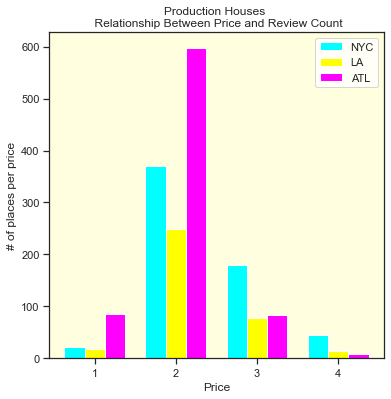

In [67]:
price_review_cnt_title = 'Production Houses \n Relationship Between Price and Review Count'
x_label = 'Price'
y_label = '# of places per price'
width = .25


x1 = df_prod_nyc['Price'].value_counts().sort_index().index[:4]
y1 = df_prod_nyc['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()

x3 = df_prod_ga['Price'].value_counts().sort_index().index[:4]
y3 = df_prod_ga['Price'].value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("lightyellow")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

🥳


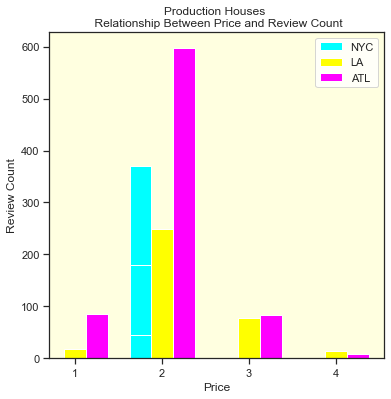

In [68]:
price_review_cnt_title = 'Production Houses \n Relationship Between Price and Review Count'
x_label = 'Price'
y_label = 'Review Count'
width = .25


x1 = df_prod_nyc['Price'].median()
y1 = df_prod_nyc['Price'].value_counts().sort_index()

x2 = df_prod_la['Price'].value_counts().sort_index().index[:4]
y2 = df_prod_la['Price'].value_counts().sort_index()

x3 = df_prod_ga['Price'].value_counts().sort_index().index[:4]
y3 = df_prod_ga['Price'].value_counts().sort_index()

# xtik = [1, 2, 3, 4]

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1, 2, 3, 4])
# ax.set_xticks(['$'*i for i in xtik])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(price_review_cnt_title)
ax.set_facecolor("lightyellow")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

#### Insights:

### Rating / Review Count

In [19]:
df_prod_ga['Rating']

0      5.0
1      5.0
2      5.0
3      4.5
4      5.0
      ... 
995    3.5
996    2.5
997    2.5
998    3.0
999    4.0
Name: Rating, Length: 1000, dtype: float64

In [20]:
x1 = df_prod_nyc['Rating'].value_counts().sort_index().index[:5]
x1

Float64Index([2.0, 2.5, 3.0, 3.5, 4.0], dtype='float64')

In [21]:
x2 = df_prod_la['Rating'].value_counts().sort_index().index[:5]
x2

Float64Index([1.5, 2.5, 3.0, 3.5, 4.0], dtype='float64')

In [22]:
x3 = df_prod_ga['Rating'].value_counts().sort_index().index[:5]
x3

Float64Index([1.0, 1.5, 2.0, 2.5, 3.0], dtype='float64')

In [23]:
df_prod_nyc['Rating'].value_counts().sort_index().index

Float64Index([2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], dtype='float64')

🥳


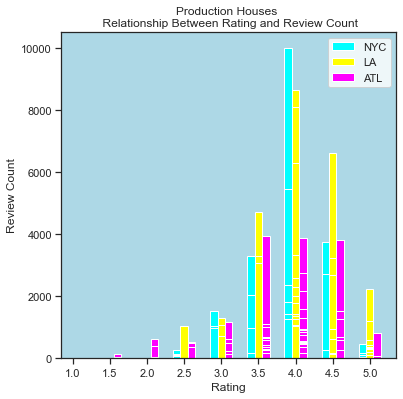

In [74]:
rating_review_cnt_title = 'Production Houses \n Relationship Between Rating and Review Count'
x_label = 'Rating'
y_label = 'Review Count'
width = .1

x1 = df_prod_nyc['Rating']
y1 = df_prod_nyc['Review Count']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Review Count']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Review Count']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(rating_review_cnt_title)
ax.set_facecolor("lightblue")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

#### Insights: 

### Rating / Price

🥳


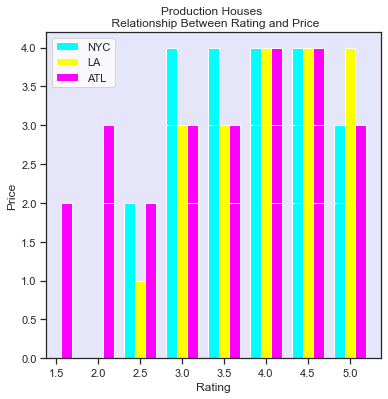

In [76]:
rating_price_title = 'Production Houses \n Relationship Between Rating and Price'
x_label = 'Rating'
y_label = 'Price'
width = .125

x1 = df_prod_nyc['Rating']
y1 = df_prod_nyc['Price']

x2 = df_prod_la['Rating']
y2 = df_prod_la['Price']

x3 = df_prod_ga['Rating']
y3 = df_prod_ga['Price']

fig, ax = plt.subplots(figsize=(6,6))

ax.set_xlabel(x_label)
ax.set_ylabel(y_label);
ax.set_xticks([1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

ax.bar(x1-(width), y1, width, color="cyan", align='center')
ax.bar(x2, y2, width, color="yellow", align= 'center')
ax.bar(x3+(width), y3, width, color="magenta", align= 'center')
ax.set_title(rating_price_title)
ax.set_facecolor("lavender")

ax.legend(['NYC', 'LA', 'ATL'])
print('🥳')

### Insights: 

Though not a great visualization, note what the above tells us about New York: <br> 
- that there are no low-rated production houses
- in fact, the highest rated production houses seem to have the lowest price
- this insight suggests that 

In [26]:
df_prod_nyc[['Price', 'Rating']]

,Price,Rating
0,NaN,5.0
1,NaN,5.0
2,NaN,4.5
3,NaN,5.0
4,NaN,4.5
...,...,...
995,NaN,3.5
996,NaN,4.0
997,NaN,4.0
998,2.0,4.0


In [27]:
df_prod_nyc.dropna()

,Name,Address,City,Rating,Review Count,Coordinates,Price,Id,Categories
6,Chart House,"['1700 Harbor Blvd', 'Weehawken, NJ 07086']",Weehawken,4.0,1527,"{'latitude': 40.7607, 'longitude': -74.018038}",3.0,_WsfOuvObbp1tH4cBE-jNw,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a..."
10,House of Yes,"['2 Wyckoff Ave', 'Brooklyn, NY 11237']",Brooklyn,4.0,296,"{'latitude': 40.70686, 'longitude': -73.92353}",1.0,XjKaW-3w7v0fGQJzIZg0cQ,"[{'alias': 'theater', 'title': 'Performing Art..."
11,Del Frisco's Double Eagle Steakhouse,"['1221 Ave Of The Americas', 'New York, NY 100...",New York,4.5,3028,"{'latitude': 40.759412, 'longitude': -73.982221}",4.0,b8a-8u_A51v2IzyjLVsx6w,"[{'alias': 'steak', 'title': 'Steakhouses'}, {..."
12,MAMA'S TOO!,"['2750 Broadway', 'New York, NY 10025']",New York,3.5,405,"{'latitude': 40.80084, 'longitude': -73.96766}",2.0,m3PS0tIaa0ChcP8Y5S-DrQ,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias..."
17,The Stone House at Clove Lakes,"['1150 Clove Rd', 'Staten Island, NY 10301']",Staten Island,3.5,222,"{'latitude': 40.6179128, 'longitude': -74.1082...",3.0,_98kz9tBW7NhCn3zHqOS0A,"[{'alias': 'breakfast_brunch', 'title': 'Break..."
...,...,...,...,...,...,...,...,...,...
990,Jajaja Plantas Mexicana,"['63 Carmine St', 'New York, NY 10014']",New York,4.5,254,"{'latitude': 40.72979, 'longitude': -74.00455}",2.0,PHMkwS5nmo4IUXbcg0OcAg,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a..."
991,The Penthouse - Ravel Hotel,"['8-08 Queens Plz S', 'Long Island City, NY 11...",Long Island City,3.0,986,"{'latitude': 40.7541228285616, 'longitude': -7...",3.0,InEqFA1IvuSLhvDBXhBR0w,"[{'alias': 'venues', 'title': 'Venues & Event ..."
992,New York Marriott Marquis,"['1535 Broadway', 'New York, NY 10036']",New York,3.5,989,"{'latitude': 40.7585862119401, 'longitude': -7...",3.0,55Ofcjm1DPf4LVr73-4-1g,"[{'alias': 'hotels', 'title': 'Hotels'}, {'ali..."
998,Sergimmo Salumeria,"['456 9th Ave', 'New York, NY 10018']",New York,4.0,683,"{'latitude': 40.754296, 'longitude': -73.995498}",2.0,9iC39Z1YjZKbrrCANgzBXg,"[{'alias': 'italian', 'title': 'Italian'}, {'a..."


<AxesSubplot:xlabel='Rating', ylabel='Price'>

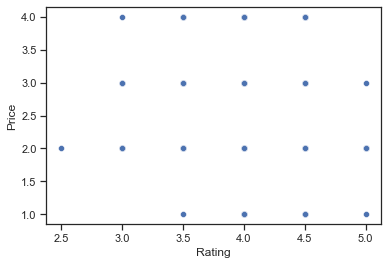

In [126]:
# hahaha = df_prod_nyc.loc[(df_prod_nyc['Rating'] >= 4)&(df_prod_nyc['Price']== 2)]
# sns.swarmplot(x="Rating", y="Price", data=hahaha)
# boxplot = sns.boxplot(data=df_prod_nyc["Price"])


sns.scatterplot(x="Rating", y="Price", data=df_prod_nyc.dropna())
# fig, ax = plt.subplots()
# sns.distplot(ax=ax)

# ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
# sns.distplot(ax=ax2)
# ax2.set_title('zoom')
# ax2.set_xlim([4,5])

# Sactter plot jitter(?) moves dots to be able to view (mpl)
# make bubbles bigger for more total reviews

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

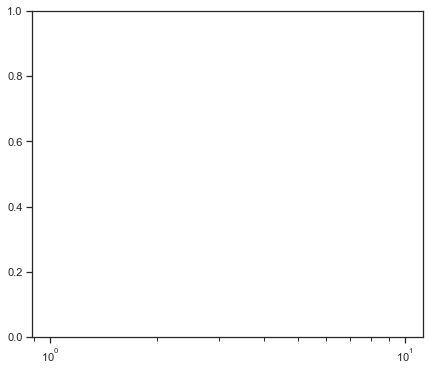

In [75]:


# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset(df_prod_nyc)

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [70]:
df_prod_nyc['Rating'].mean()

4.1815

In [71]:
df_prod_nyc['Rating'].median()

4.0

In [72]:
df_prod_nyc['Price'].mean()

2.4032520325203253

In [73]:
df_prod_nyc['Price'].median()

2.0

NameError: name 'x1' is not defined

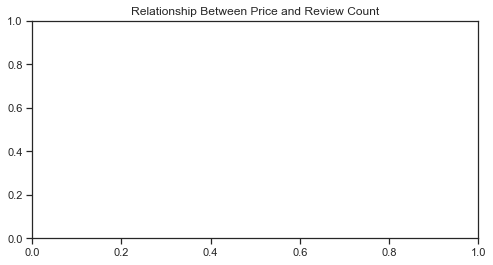

In [10]:
scatter_plot_title = 'Relationship Between Price and Review Count'
x_label = 'Review Count'
y_label = 'Price'
# your code here
tackle_figure, ax = plt.subplots(figsize=(8, 4))



# y1 = df_prod_nyc['Price'].value_counts().sort_index()
# y2 = df_prod_la['Price'].value_counts()
# x1 = df_prod_nyc['Price'].value_counts().sort_index()
# x2 = df_prod_la['Review Count']
ax.set_title(scatter_plot_title) #difficulty setting title is because ncols sets an array of 2, but we only have 1 title

ax.bar(x1, y1, color='cyan')
ax.bar(x2, y2, color='red');

In [ ]:
N = 2
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, x1, width, color='royalblue') # yerr=menStd)
womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, x2, width, color='seagreen') # yerr=womenStd
# add some
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )
ax.legend( (rects1[0], rects2[0]), ('NYC', 'NYC') )
plt.show()

In [11]:
sns.barplot(x1,y1)

NameError: name 'x1' is not defined

In [129]:
df_prod_ny = pd.read_csv('database/Production House_New York_database.csv')
df_prod_la = pd.read_csv('database/Production House_Los Angeles_database.csv')
df_prod_ga = pd.read_csv('database/Production House_Atlanta_database.csv')

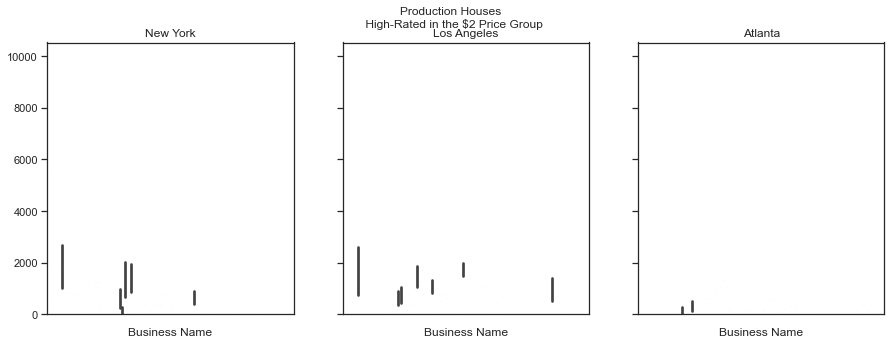

In [143]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2)]
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Production Houses \n High-Rated in the $2 Price Group')
# NY
g1 = sns.barplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values)
ax[0].set_title('New York')
# LA
g2 = sns.barplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')
# ATL
g3 = sns.barplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta');
g1.set(xticklabels=[])
g2.set(xticklabels=[])
g3.set(xticklabels=[])
g1.set(xlabel='Business Name')
g2.set(xlabel='Business Name')
g3.set(xlabel='Business Name')
g1.tick_params(bottom=False) 
g2.tick_params(bottom=False) 
g3.tick_params(bottom=False) 

Text(0.5, 0, 'ATL Production House Business Name')

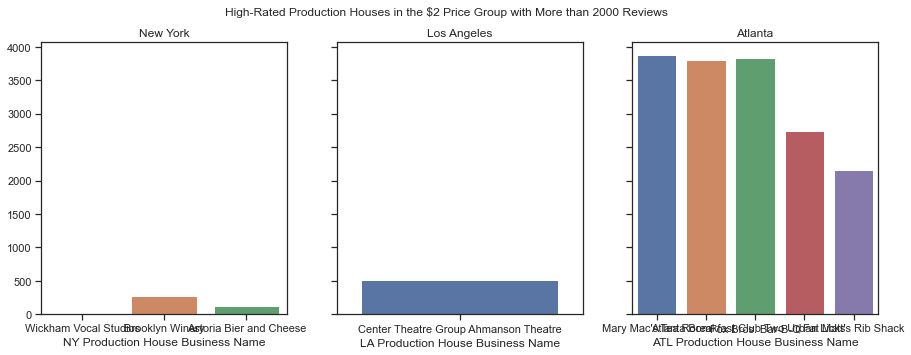

In [145]:
ny_prod_high_rating_price2 = df_prod_ny.loc[(df_prod_ny['Rating'] >= 4) & (df_prod_ny['Price'] == 2) & (df_prod_ga['Review Count'] >= 2000)]
la_prod_high_rating_price2 = df_prod_la.loc[(df_prod_la['Rating'] >= 4) & (df_prod_la['Price'] == 2) & (df_prod_ga['Review Count'] >= 2000)]
ga_prod_high_rating_price2 = df_prod_ga.loc[(df_prod_ga['Rating'] >= 4) & (df_prod_ga['Price'] == 2) & (df_prod_ga['Review Count'] >= 2000)]
fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('High-Rated Production Houses in the $2 Price Group with More than 2000 Reviews')
# NY
g1 = sns.barplot(ax=ax[0], x= ny_prod_high_rating_price2['Name'], y= ny_prod_high_rating_price2['Review Count'].values)
ax[0].set_title('New York')
# LA
g2 = sns.barplot(ax=ax[1], x= la_prod_high_rating_price2['Name'], y= la_prod_high_rating_price2['Review Count'].values)
ax[1].set_title('Los Angeles')
# ATL
g3 = sns.barplot(ax=ax[2], x= ga_prod_high_rating_price2['Name'], y= ga_prod_high_rating_price2['Review Count'].values)
ax[2].set_title('Atlanta')
g1.set_xlabel('NY Production House Business Name')
g2.set_xlabel('LA Production House Business Name')
g3.set_xlabel('ATL Production House Business Name')